included nessasary libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrices

In [ ]:

# Load the dataset
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

# Define features and target variable
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", 
            "condition", "grade", "sqft_above", "sqft_basement", "yr_built"]
target = "price"


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Simple linear regression

Intercept: -43580.743
Coefficient: 280.624


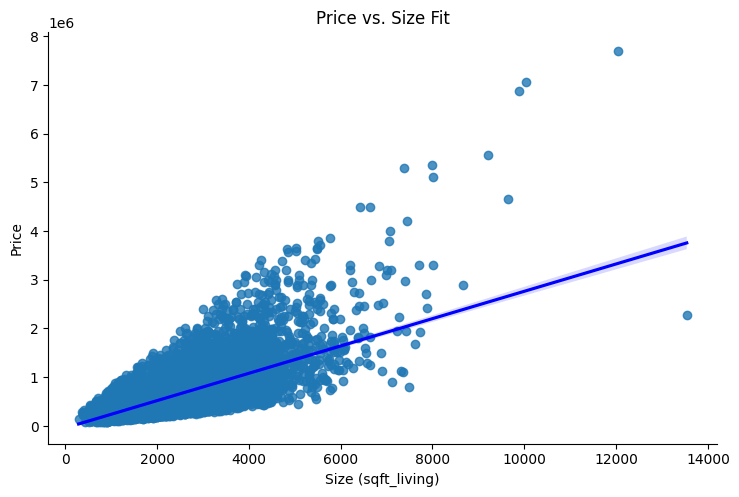

In [5]:

# Simple Linear Regression
X = house_df[["sqft_living"]]
y = house_df[target]

simple_lm = LinearRegression()
simple_lm.fit(X, y)

print(f'Intercept: {simple_lm.intercept_:.3f}')
print(f'Coefficient: {simple_lm.coef_[0]:.3f}')

# Scatter plot with regression line
sns.lmplot(x="sqft_living", y="price", data=house_df, aspect=1.5, line_kws={'color': 'blue'})
plt.title("Price vs. Size Fit")
plt.xlabel("Size (sqft_living)")
plt.ylabel("Price")
plt.show()

Multiple Linear Regression

In [ ]:
# Multiple Linear Regression with Full Summary
features = ["sqft_living", "sqft_lot", "bathrooms", "bedrooms", "grade"]
X = house_df[features]
X = sm.add_constant(X)  # Add intercept term

house_lm_full = sm.OLS(y, X).fit()

# Print model summary
print(house_lm_full.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5169.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:28:43   Log-Likelihood:            -2.9910e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.716e+05   1.49e+04    -31.652      

In [14]:
# Extract key metrics
RMSE = np.sqrt(mean_squared_error(y, house_lm_full.fittedvalues))
R_squared = house_lm_full.rsquared
p_values = house_lm_full.pvalues

# Print Results
print(f'RMSE: {RMSE:.2f}')
print(f'R²: {R_squared:.4f}')
print('P-values:')
print(p_values)

RMSE: 247731.82
R²: 0.5446
P-values:
const          5.659217e-215
sqft_living     0.000000e+00
sqft_lot        4.922631e-15
bathrooms       9.365169e-16
bedrooms        5.054862e-70
grade           0.000000e+00
dtype: float64


categorical variable

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(123)

# Create dataset
house = pd.DataFrame({
    'HouseID': range(1, 13),
    'SqFtTotLiving': [1500, 1800, 1600, 1700, 1900, 1750, 2000, 1400, 2100, 2200, 1850, 1950],
    'SqFtLot': [5000, 6000, 5500, 5200, 5800, 5700, 6200, 4900, 7000, 6800, 6400, 6600],
    'Bathrooms': [2, 3, 2, 2, 4, 3, 3, 2, 4, 3, 3, 2],
    'Bedrooms': [3, 4, 3, 3, 5, 4, 4, 3, 5, 4, 4, 3],
    'BldgGrade': [7, 8, 7, 6, 9, 8, 7, 6, 10, 9, 8, 7],
    'PropertyType': ["Multiplex", "Single Family", "Single Family", "Single Family",
                     "Single Family", "Townhouse", "Multiplex", "Townhouse",
                     "Single Family", "Multiplex", "Townhouse", "Single Family"],
    'AdjSalePrice': [300000, 320000, 310000, 330000, 350000, 340000, 355000, 290000,
                     370000, 360000, 345000, 325000]
})

# Convert PropertyType to categorical and ensure it's treated correctly
house['PropertyType'] = pd.Categorical(house['PropertyType'], categories=["Multiplex", "Single Family", "Townhouse"], ordered=True)

# One-hot encode categorical variable (drop first to avoid multicollinearity)
house = pd.get_dummies(house, columns=['PropertyType'], drop_first=True)

# Ensure all columns are numeric
house = house.apply(pd.to_numeric, errors='coerce')

# Define predictor variables and target variable
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'BldgGrade', 'PropertyType_Single Family', 'PropertyType_Townhouse']
X = house[predictors]
y = house['AdjSalePrice']

# Add intercept for statsmodels
X_sm = sm.add_constant(X)

# Ensure numeric types before passing to statsmodels
X_sm = X_sm.astype(float)
y = y.astype(float)

# Fit the regression model using statsmodels for detailed summary
model = sm.OLS(y, X_sm).fit()
print(model.summary())

# Fit the regression model using sklearn for simple usage
house_lm = LinearRegression()
house_lm.fit(X, y)

# Print coefficients
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm.coef_):
    print(f' {name}: {coef:.3f}')


                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     10.43
Date:                Wed, 26 Feb 2025   Prob (F-statistic):             0.0105
Time:                        14:25:29   Log-Likelihood:                -122.31
No. Observations:                  12   AIC:                             258.6
Df Residuals:                       5   BIC:                             262.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\Prageeth\miniconda3\envs\jupyter_3.9\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Line fit


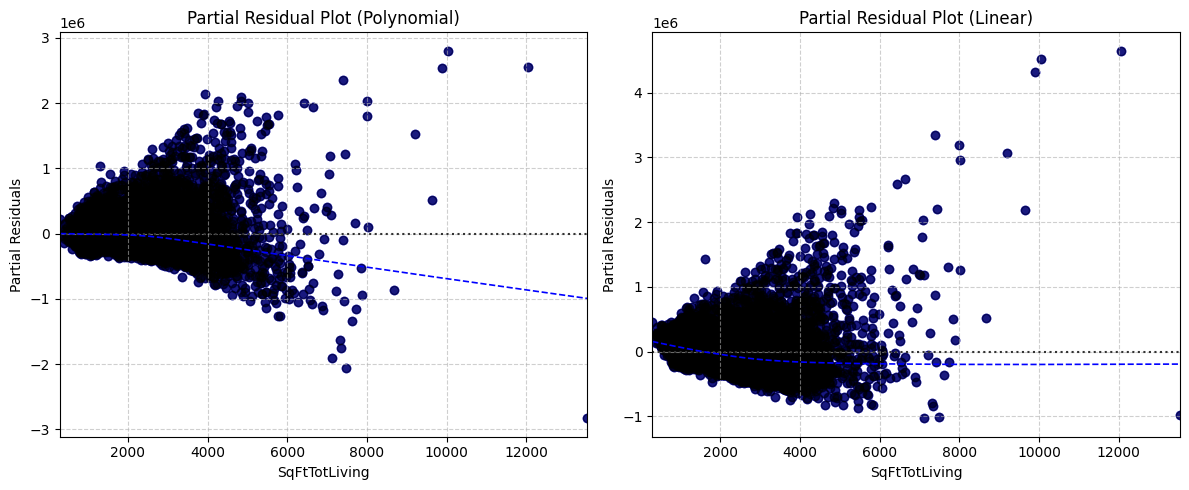

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix

# Load the dataset
house_df = pd.read_csv("C:\\Users\\Prageeth\\Source\\MSC\\seminar-course\\advanced-regression-kc\\kc_house_data.csv")

# Define features and target variable
features = ["sqft_living", "sqft_lot", "bathrooms", "bedrooms", "grade"]
target = "price"

# Ensure there are no missing values
house_df = house_df.dropna(subset=features + [target])

# Polynomial Regression Model (degree 2 for sqft_living)
X_poly = dmatrix("bs(sqft_living, df=6, include_intercept=False) + sqft_lot + grade + bathrooms + bedrooms",
                 data=house_df, return_type='dataframe')
y = house_df[target]

model_poly = sm.OLS(y, sm.add_constant(X_poly)).fit()

# Standard Linear Regression Model
X_linear = house_df[["sqft_living", "bathrooms", "bedrooms", "grade"]]
X_linear = sm.add_constant(X_linear)
house_lm_2 = sm.OLS(y, X_linear).fit()

# Partial Residual Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Polynomial Model Residual Plot
sns.residplot(x=house_df["sqft_living"], y=model_poly.resid, lowess=True, ax=axes[0], color="blue", line_kws={"linewidth": 1.2, "linestyle": "dashed"})
axes[0].scatter(house_df["sqft_living"], model_poly.resid, color="black", edgecolors='k', alpha=0.5)
axes[0].set_title("Partial Residual Plot (Polynomial)")
axes[0].set_xlabel("SqFtTotLiving")
axes[0].set_ylabel("Partial Residuals")
axes[0].grid(True, linestyle="--", alpha=0.6)

# Standard Linear Model Residual Plot
sns.residplot(x=house_df["sqft_living"], y=house_lm_2.resid, lowess=True, ax=axes[1], color="blue", line_kws={"linewidth": 1.2, "linestyle": "dashed"})
axes[1].scatter(house_df["sqft_living"], house_lm_2.resid, color="black", edgecolors='k', alpha=0.5)
axes[1].set_title("Partial Residual Plot (Linear)")
axes[1].set_xlabel("SqFtTotLiving")
axes[1].set_ylabel("Partial Residuals")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


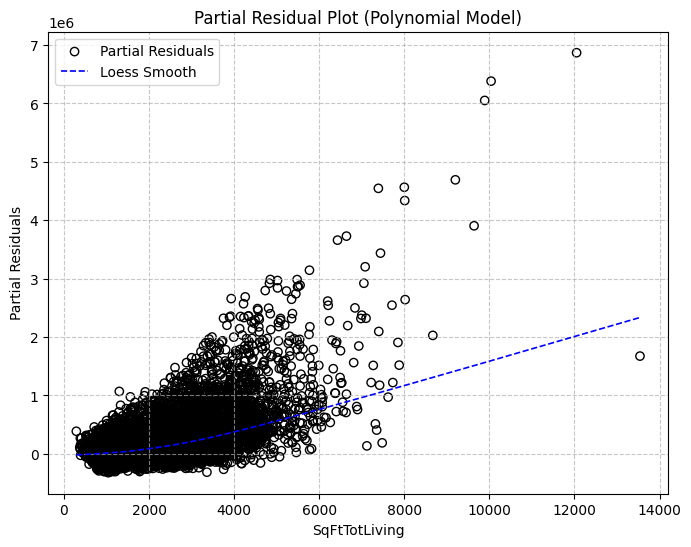

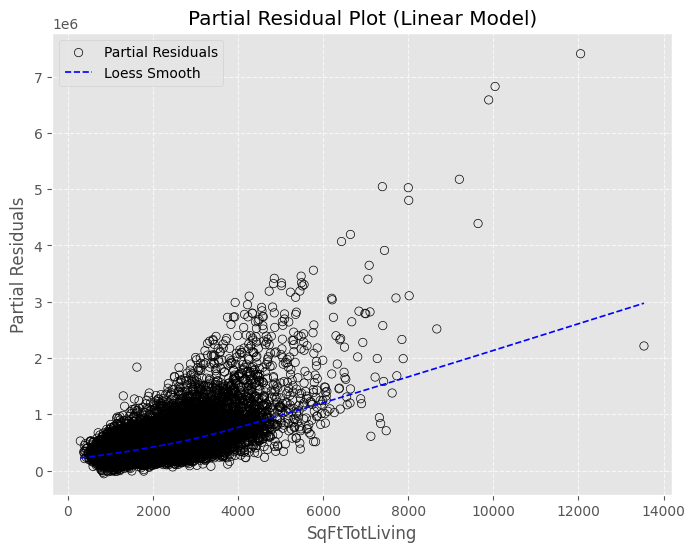

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming 'house_df' is your dataset (replace with actual data loading if needed)
# Example: house_df = pd.read_csv('your_data.csv')
# For demonstration, I'll assume a DataFrame 'house_df' with the required columns

# 1. Polynomial Regression Model (Quadratic)
formula_poly = 'price ~ sqft_living + I(sqft_living**2) + sqft_lot + bathrooms + bedrooms + grade'
model_poly = smf.ols(formula=formula_poly, data=house_df).fit()

# Calculate partial residuals for 'sqft_living' (inspired by page 185)
terms_poly = model_poly.predict(house_df)  # Predicted values using the original DataFrame
residuals_poly = model_poly.resid  # Ordinary residuals
partial_residuals_poly = residuals_poly + model_poly.params['sqft_living'] * house_df['sqft_living'] + \
                        model_poly.params['I(sqft_living ** 2)'] * (house_df['sqft_living']**2)

# Create the partial residual plot for polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(house_df['sqft_living'], partial_residuals_poly, color='black', marker='o', facecolors='none', label='Partial Residuals')
sns.regplot(x=house_df['sqft_living'], y=partial_residuals_poly, lowess=True, scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.2}, label='Loess Smooth')
plt.xlabel('SqFtTotLiving')
plt.ylabel('Partial Residuals')
plt.title('Partial Residual Plot (Polynomial Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  # Changed to 'ggplot' for a cleaner look similar to theme_minimal()
plt.show()

# 2. Linear Regression Model (No Polynomial)
formula_linear = 'price ~ sqft_living + sqft_lot + bathrooms + bedrooms + grade'
model_linear = smf.ols(formula=formula_linear, data=house_df).fit()

# Calculate partial residuals for 'sqft_living'
terms_linear = model_linear.predict(house_df)  # Predicted values using the original DataFrame
residuals_linear = model_linear.resid  # Ordinary residuals
partial_residuals_linear = residuals_linear + model_linear.params['sqft_living'] * house_df['sqft_living']

# Create the partial residual plot for linear model
plt.figure(figsize=(8, 6))
plt.scatter(house_df['sqft_living'], partial_residuals_linear, color='black', marker='o', facecolors='none', label='Partial Residuals')
sns.regplot(x=house_df['sqft_living'], y=partial_residuals_linear, lowess=True, scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.2}, label='Loess Smooth')
plt.xlabel('SqFtTotLiving')
plt.ylabel('Partial Residuals')
plt.title('Partial Residual Plot (Linear Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  # Changed to 'ggplot' for a cleaner look
plt.show()

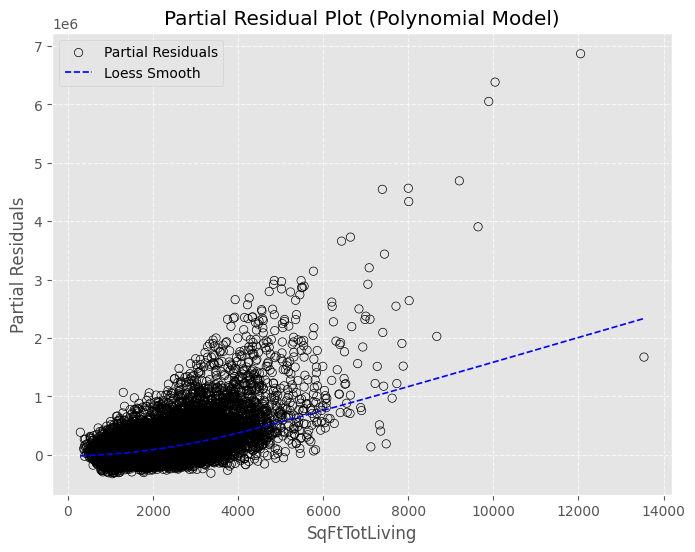

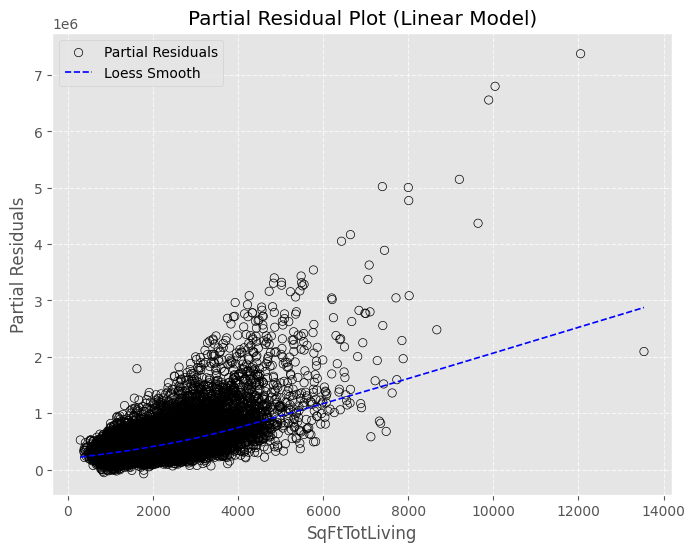

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Assuming 'house_df' is your dataset (replace with actual data loading if needed)
# Example: house_df = pd.read_csv('your_data.csv')
# For demonstration, I'll assume a DataFrame 'house_df' with the required columns

# 1. Polynomial Regression Model (Quadratic, matches model_poly in R)
formula_poly = 'price ~ sqft_living + I(sqft_living**2) + sqft_lot + bathrooms + bedrooms + grade'
model_poly = smf.ols(formula=formula_poly, data=house_df).fit()

# Calculate partial residuals for 'sqft_living' (includes linear and quadratic terms)
terms_poly = model_poly.predict(house_df)  # Predicted values
residuals_poly = model_poly.resid  # Ordinary residuals
partial_residuals_poly = residuals_poly + model_poly.params['sqft_living'] * house_df['sqft_living'] + \
                        model_poly.params['I(sqft_living ** 2)'] * (house_df['sqft_living']**2)

# Create the partial residual plot for polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(house_df['sqft_living'], partial_residuals_poly, color='black', marker='o', facecolors='none', label='Partial Residuals')
sns.regplot(x=house_df['sqft_living'], y=partial_residuals_poly, lowess=True, scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.2}, label='Loess Smooth')
plt.xlabel('SqFtTotLiving')
plt.ylabel('Partial Residuals')
plt.title('Partial Residual Plot (Polynomial Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  # Cleaner look similar to theme_minimal()
plt.show()

# 2. Linear Regression Model (No Polynomial, matches house_lm_2 in R)
formula_linear = 'price ~ sqft_living + bathrooms + bedrooms + grade'  # No sqft_living squared term
model_linear = smf.ols(formula=formula_linear, data=house_df).fit()

# Calculate partial residuals for 'sqft_living' (linear term only)
terms_linear = model_linear.predict(house_df)  # Predicted values
residuals_linear = model_linear.resid  # Ordinary residuals
partial_residuals_linear = residuals_linear + model_linear.params['sqft_living'] * house_df['sqft_living']

# Create the partial residual plot for linear model
plt.figure(figsize=(8, 6))
plt.scatter(house_df['sqft_living'], partial_residuals_linear, color='black', marker='o', facecolors='none', label='Partial Residuals')
sns.regplot(x=house_df['sqft_living'], y=partial_residuals_linear, lowess=True, scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.2}, label='Loess Smooth')
plt.xlabel('SqFtTotLiving')
plt.ylabel('Partial Residuals')
plt.title('Partial Residual Plot (Linear Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')
plt.show()

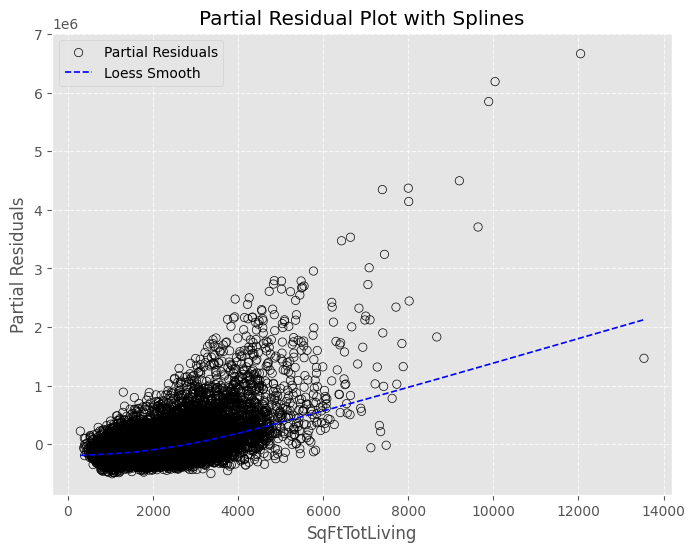

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Assuming 'house_df' is your dataset (replace with actual data loading if needed)
# Example: house_df = pd.read_csv('your_data.csv')
# For demonstration, I'll assume a DataFrame 'house_df' with the required columns

# Fit Spline Regression Model (Cubic B-Spline with df=6)
formula_spline = 'price ~ bs(sqft_living, df=6, degree=3) + sqft_lot + bathrooms + bedrooms + grade'
model_spline = smf.ols(formula=formula_spline, data=house_df).fit()

# Calculate partial residuals for 'sqft_living'
# Since bs() creates multiple terms, we sum the contributions of all spline terms
terms_spline = model_spline.predict(house_df)  # Predicted values
residuals_spline = model_spline.resid  # Ordinary residuals

# Extract spline terms for 'sqft_living' (bs() generates multiple columns)
spline_params = [param for param in model_spline.params.index if 'bs(sqft_living' in param]
partial_residuals_spline = residuals_spline.copy()
for param in spline_params:
    # Get the index of the spline term in the design matrix
    term_index = list(model_spline.model.exog_names).index(param)
    partial_residuals_spline += model_spline.params[param] * model_spline.model.exog[:, term_index]

# Create the partial residual plot for spline model
plt.figure(figsize=(8, 6))
plt.scatter(house_df['sqft_living'], partial_residuals_spline, color='black', marker='o', facecolors='none', label='Partial Residuals')
sns.regplot(x=house_df['sqft_living'], y=partial_residuals_spline, lowess=True, scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.2}, label='Loess Smooth')
plt.xlabel('SqFtTotLiving')
plt.ylabel('Partial Residuals')
plt.title('Partial Residual Plot with Splines')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  # Cleaner look similar to theme_minimal()
plt.show()

In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from itertools import combinations

# Assuming 'house_df' is your dataset (replace with actual data loading)
# Example: house_df = pd.read_csv('your_data.csv')
# For demonstration, I'll assume 'house_df' has columns: price, sqft_living, sqft_lot15, bathrooms, bedrooms, grade, yr_renovated

# Define the full model (equivalent to house_full in R)
formula_full = 'price ~ sqft_living + sqft_lot15 + bathrooms + bedrooms + grade + yr_renovated'
model_full = smf.ols(formula=formula_full, data=house_df.dropna()).fit()

# Stepwise selection function (mimicking stepAIC with direction="both")
def stepwise_selection(data, response, predictors, direction='both'):
    remaining = set(predictors)
    current = set(predictors)  # Start with all predictors (like house_full)
    best_model = model_full
    best_aic = model_full.aic

    def fit_model(preds):
        formula = f"{response} ~ {' + '.join(preds)}"
        return smf.ols(formula, data=data).fit()

    improved = True
    while improved and remaining:
        improved = False
        # Backward elimination
        if direction in ['both', 'backward']:
            for predictor in current:
                trial_preds = current - {predictor}
                if not trial_preds:  # Ensure at least one predictor remains
                    continue
                trial_model = fit_model(trial_preds)
                if trial_model.aic < best_aic:
                    best_aic = trial_model.aic
                    best_model = trial_model
                    current = trial_preds
                    improved = True
                    break

        # Forward selection (add back if removed)
        if direction in ['both', 'forward'] and improved:
            for predictor in remaining - current:
                trial_preds = current | {predictor}
                trial_model = fit_model(trial_preds)
                if trial_model.aic < best_aic:
                    best_aic = trial_model.aic
                    best_model = trial_model
                    current = trial_preds
                    improved = True
                    break

    return best_model

# Predictors list
predictors = ['sqft_living', 'sqft_lot15', 'bathrooms', 'bedrooms', 'grade', 'yr_renovated']
response = 'price'

# Run stepwise selection (direction="both")
step_model = stepwise_selection(house_df.dropna(), response, predictors, direction='both')

# Print summary to match R output
print(step_model.summary())

# Extract and print coefficients explicitly to verify exact match
print("\nCoefficients:")
for param, value in step_model.params.items():
    print(f"{param}: {value:.3e}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4493.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:47:40   Log-Likelihood:            -2.9885e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21606   BIC:                         5.978e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.841e+05   1.48e+04    -32.777   

In [34]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices

# Assuming house_df is in your environment
# If not, load it: house_df = pd.read_csv('your_data.csv')
house_df = house_df.copy()

# Convert 'date' to year
house_df['Year'] = pd.to_datetime(house_df['date'].str[:8], format='%Y%m%d').dt.year
house_df['Weight'] = house_df['Year'] - 2005

# Debug: Check weights
print("Year Distribution:")
print(house_df['Year'].value_counts())
print("Weight Distribution:")
print(house_df['Weight'].value_counts())

# Drop missing values
house_df = house_df.dropna()

# Define formula
formula = 'price ~ sqft_living + sqft_lot + bathrooms + bedrooms + grade'

# Create design matrices
y, X = dmatrices(formula, data=house_df, return_type='dataframe')

# Fit unweighted model (OLS)
house_lm = sm.OLS(y, X).fit()

# Fit weighted model (WLS)
house_wt = sm.WLS(y, X, weights=house_df['Weight']).fit()

# Compare coefficients
coeff_comparison = pd.DataFrame({
    'house_lm': house_lm.params,
    'house_wt': house_wt.params
}).round(3)

print("\nCoefficients Comparison:")
print(coeff_comparison)

# Debug: Verify fit
print("\nUnweighted RSS (house_lm):", house_lm.ssr)
print("Weighted RSS (house_wt):", house_wt.ssr)
print("\nWeighted Model Summary:")
print(house_wt.summary())

Year Distribution:
Year
2014    14633
2015     6980
Name: count, dtype: int64
Weight Distribution:
Weight
9     14633
10     6980
Name: count, dtype: int64

Coefficients Comparison:
               house_lm    house_wt
Intercept   -471575.692 -472501.632
sqft_living     231.350     230.816
sqft_lot         -0.325      -0.317
bathrooms    -27973.439  -28075.162
bedrooms     -40744.142  -40639.355
grade         95586.697   95883.234

Unweighted RSS (house_lm): 1326412606841869.5
Weighted RSS (house_wt): 1.2380529247977358e+16

Weighted Model Summary:
                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            WLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5150.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:53:08   Log-Likelih

Statsmodels version: 0.14.4


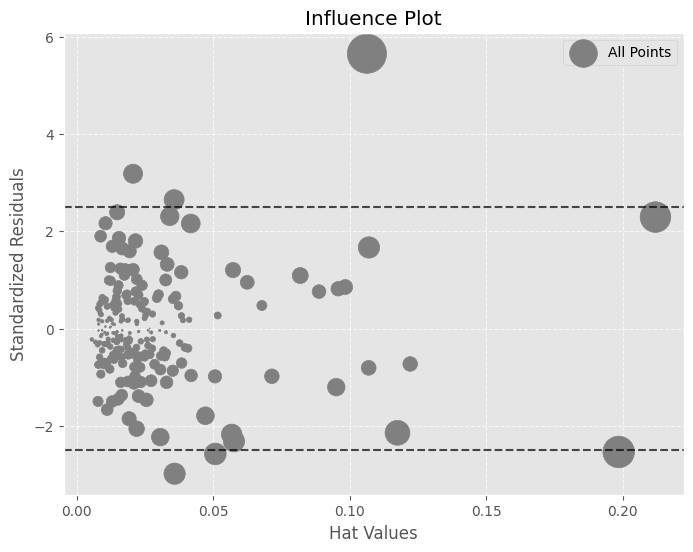

Number of rows in house_98105: 229
Number of points with Cook's D > 0.08: 4


In [40]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as oi
import matplotlib.pyplot as plt

# Check statsmodels version
import statsmodels
print(f"Statsmodels version: {statsmodels.__version__}")

# Assuming house_df is in your environment
house_df = house_df.copy()

# Subset to zip code 98105
house_98105 = house_df[house_df['zipcode'] == 98105]

# Fit linear regression model
formula = 'price ~ sqft_living + sqft_lot + bathrooms + bedrooms + grade'
lm_98105 = smf.ols(formula=formula, data=house_98105).fit()

# Compute regression diagnostics
influence = oi.OLSInfluence(lm_98105)
std_resid = influence.resid_studentized_internal  # Standardized residuals
cooks_d = influence.cooks_distance[0]  # Cook's distance
hat_values = influence.hat_matrix_diag  # Hat values (leverage)

# Create influence plot
plt.figure(figsize=(8, 6))

# Plot all points with sizes proportional to sqrt(Cook's D), matching R's points()
plt.scatter(hat_values, std_resid, 
            s=10 * np.sqrt(cooks_d) * 100,  # Size scaled by sqrt(Cook's D), matching cex=10*sqrt(cooks_D)
            color='grey', marker='o', label='All Points')

# Add horizontal dashed lines at y = ±2.5, matching abline(h=c(-2.5, 2.5), lty=2)
plt.axhline(y=2.5, color='black', linestyle='--', alpha=0.7)
plt.axhline(y=-2.5, color='black', linestyle='--', alpha=0.7)

# Add labels and formatting
plt.xlabel('Hat Values')
plt.ylabel('Standardized Residuals')
plt.title('Influence Plot')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Debug: Verify number of rows and influential points
print(f"Number of rows in house_98105: {len(house_98105)}")
print(f"Number of points with Cook's D > 0.08: {sum(cooks_d > 0.08)}")

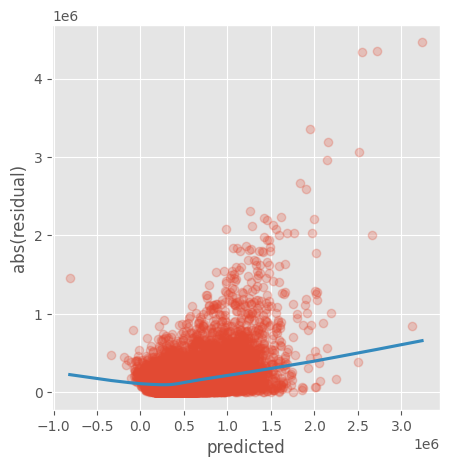

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define predictors and response based on your column names
predictors = ['sqft_living', 'sqft_lot15', 'bathrooms', 'bedrooms', 'grade', 'yr_renovated']
response = 'price'

# Fit the regression model using statsmodels
model = smf.ols(formula=f'{response} ~ {" + ".join(predictors)}', data=house_df)
result = model.fit()

# Create a DataFrame with residuals and predicted values
df = pd.DataFrame({
    'resid': result.resid,  # Residuals from the fitted model
    'pred': result.fittedvalues  # Predicted values from the fitted model
})

# Create the plot using seaborn
plt.figure(figsize=(5, 5))  # Set figure size (optional)
sns.regplot(
    x='pred', 
    y=abs(df['resid']),  # Absolute value of residuals
    data=df, 
    scatter_kws={'alpha': 0.25},  # Transparency for scatter points
    line_kws={'color': 'C1'},  # Color for the smooth line (orange)
    lowess=True  # Use LOESS smoothing like geom_smooth in R
)

# Set labels
plt.xlabel('predicted')
plt.ylabel('abs(residual)')

# Display the plot
plt.show()

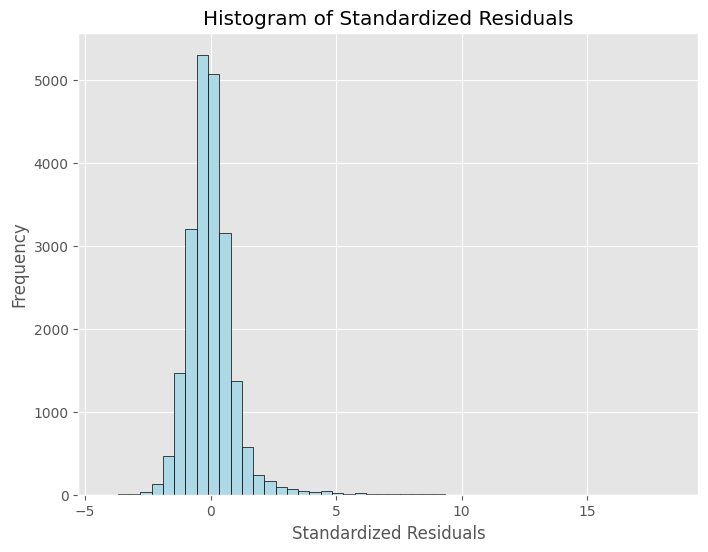

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

# Define predictors and response
predictors = ['sqft_living', 'sqft_lot15', 'bathrooms', 'bedrooms', 'grade', 'yr_renovated']
response = 'price'

# Fit the regression model
model = smf.ols(formula=f'{response} ~ {" + ".join(predictors)}', data=house_df)
result = model.fit()

# Calculate standardized residuals
influence = OLSInfluence(result)
std_resid = influence.resid_studentized_internal  # Standardized residuals

# Create the histogram
plt.figure(figsize=(8, 6))  # Optional: set figure size
plt.hist(std_resid, bins=50, color='lightblue', edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')

# Display the plot
plt.show()

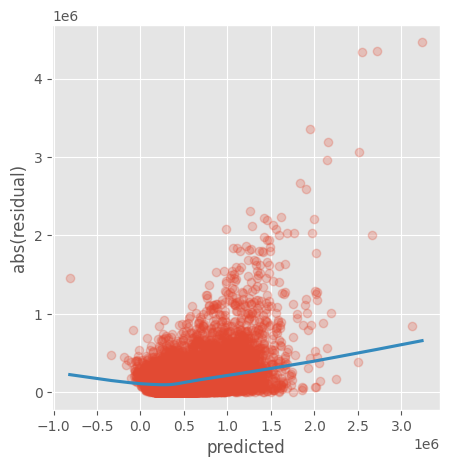

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define predictors and response based on your column names
predictors = ['sqft_living', 'sqft_lot15', 'bathrooms', 'bedrooms', 'grade', 'yr_renovated']
response = 'price'

# Fit the regression model using statsmodels
model = smf.ols(formula=f'{response} ~ {" + ".join(predictors)}', data=house_df)
result = model.fit()

# Create a DataFrame with residuals and predicted values
df = pd.DataFrame({
    'resid': result.resid,  # Residuals from the fitted model
    'pred': result.fittedvalues  # Predicted values from the fitted model
})

# Create the plot using seaborn
plt.figure(figsize=(5, 5))  # Set figure size (optional)
sns.regplot(
    x='pred', 
    y=abs(df['resid']),  # Absolute value of residuals
    data=df, 
    scatter_kws={'alpha': 0.25},  # Transparency for scatter points
    line_kws={'color': 'C1'},  # Color for the smooth line (orange)
    lowess=True  # Use LOESS smoothing like geom_smooth in R
)

# Set labels
plt.xlabel('predicted')
plt.ylabel('abs(residual)')

# Display the plot
plt.show()